/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Epoch 1/20 - Train Accuracy: 37.69%
Epoch 2/20 - Train Accuracy: 78.14%
Epoch 3/20 - Train Accuracy: 89.20%
Epoch 4/20 - Train Accuracy: 89.45%
Epoch 5/20 - Train Accuracy: 89.20%
Epoch 6/20 - Train Accuracy: 85.93%
Epoch 7/20 - Train Accuracy: 89.70%
Epoch 8/20 - Train Accuracy: 89.95%
Epoch 9/20 - Train Accuracy: 90.20%
Epoch 10/20 - Train Accuracy: 90.70%
Epoch 11/20 - Train Accuracy: 90.70%
Epoch 12/20 - Train Accuracy: 89.95%
Epoch 13/20 - Train Accuracy: 90.45%
Epoch 14/20 - Train Accuracy: 89.20%
Epoch 15/20 - Train Accuracy: 90.20%
Epoch 16/20 - Train Accuracy: 90.70%
Epoch 17/20 - Train Accuracy: 90.70%
Epoch 18/20 - Train Accuracy: 89.95%
Epoch 19/20 - Train Accuracy: 89.70%
Epoch 20/20 - Train Accuracy: 90.70%


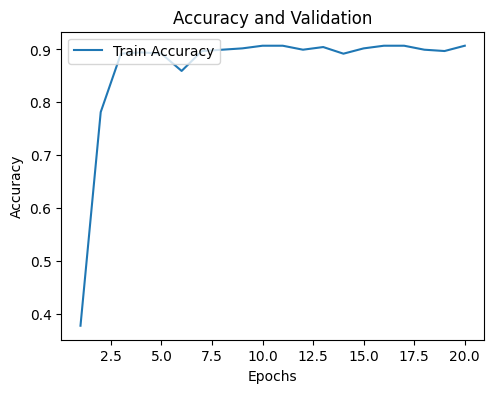

Confusion Matrix: 
 [[99  3]
 [13 56]]
Accuracy:  90.64327485380117
Report: 
               precision    recall  f1-score   support

           B       0.88      0.97      0.93       102
           M       0.95      0.81      0.87        69

    accuracy                           0.91       171
   macro avg       0.92      0.89      0.90       171
weighted avg       0.91      0.91      0.90       171



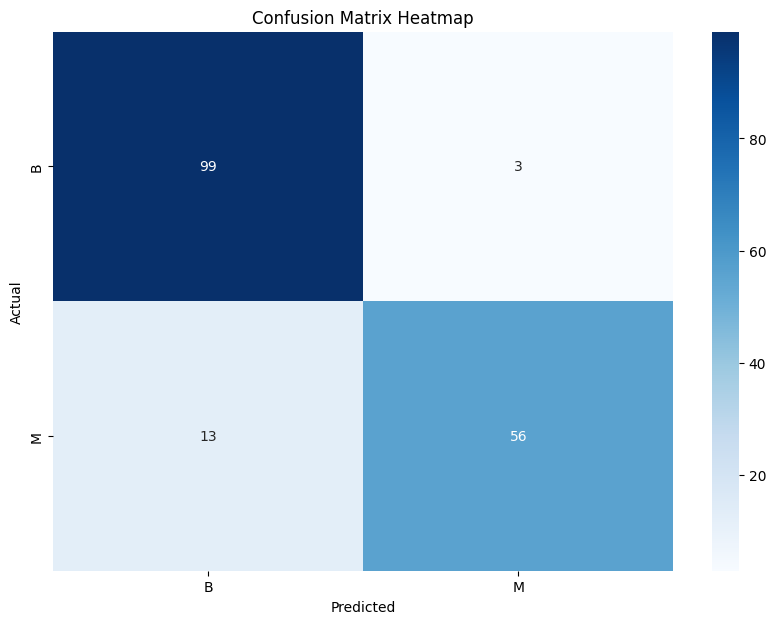

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

# Function to import data
def importdata():
    balance_data = pd.read_csv('/content/drive/MyDrive/data4.csv', sep=',', header=None)
    return balance_data

# Function to split the dataset into features and target variables
def splitdataset(balance_data):
    # Separating the target variable
    X = balance_data.values[:, 2:]
    Y = balance_data.values[:, 1]

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    return X_train, X_test, y_train, y_test

# Function to calculate and print accuracy
def cal_accuracy(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: \n", cm)
    print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)
    print("Report: \n", classification_report(y_test, y_pred))
    # Plotting the confusion matrix heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

# Import the data
balance_data = importdata()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = splitdataset(balance_data)

# Create the logistic regression model with warm_start=True to keep previous training progress
clf = LogisticRegression(max_iter=1, warm_start=True, solver='saga')

# Variables to store accuracy over epochs
train_accuracies = []
test_accuracies = []

# Number of epochs
epochs = 20

for epoch in range(epochs):
    clf.fit(X_train, y_train)

    # Calculate train and test accuracy
    train_pred = clf.predict(X_train)


    train_acc = accuracy_score(y_train, train_pred)

    train_accuracies.append(train_acc)
    print(f'Epoch {epoch+1}/{epochs} - Train Accuracy: {train_acc * 100:.2f}%')


#test_accuracies.append(test_acc)

test_pred = clf.predict(X_test)



# Plotting the accuracy values over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
#plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.title('Accuracy and Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='upper left')

plt.show()

# Make predictions for the final model
y_pred = clf.predict(X_test)

# Calculate and print final accuracy
cal_accuracy(y_test, y_pred)